решение нелинейной системы и количество итераций: [1.16827335 0.86284999] 5


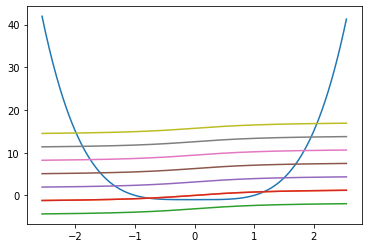

минимальное количество итераций: 5


In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
MAX = 4
delta = 1e-5
delta_x =1e-8
n = 2
epsilon = 1e-5
X = np.array([1,1],float)
def f1(X):
  #return math.sin(2*X[0] - X[1]) - 1.2*X[0] - 0.4
  return X[0]**4-(X[1]+1)
def f2(X):
  #return 0.8*X[0]**2+1.5*X[1]**2-1
  return X[0]-math.tan(X[1])

def derivative_X_f1(X):
  #return 2*math.cos(2*X[0] - X[1]) - 1.2
  return 4*X[0]**3
def derivative_Y_f1(X):
  #return -math.cos(2*X[0]-X[1])
  return -1
def derivative_X_f2(X):
  #return 1.6*X[0]
  return 1
def derivative_Y_f2(X):
  if math.cos(X[1])!=0:
    #return 3*X[1]
    return -1/((math.cos(X[1]))**2)

F =np.array([f1(X),f2(X)],float)
F =F.reshape(n,-1)
W = np.array([derivative_X_f1(X),derivative_Y_f1(X),derivative_X_f2(X),derivative_Y_f2(X)],float)
W = W.reshape(n,-1)
sum1=1
k=0

while sum1>1e-5:
  W = np.array([derivative_X_f1(X),derivative_Y_f1(X),derivative_X_f2(X),derivative_Y_f2(X)],float)
  W = W.reshape(n,-1)
  F =np.array([f1(X),f2(X)],float)
  F =F.reshape(n,-1)
  F=-F
  c = np.linalg.solve(W,F)
  for i in range(2):
    z=X[i]+c[i]
    X[i]=z
  sum1=0
  for i in range(2):
    sum1 = sum1 + c[i]*c[i]
  sum1=sum1**0.5
  k=k+1
print('решение нелинейной системы и количество итераций:',X,k)

def F1(x):
  return x**4 - 1
def F2(x):
  return math.atan(x)
YYY1 = np.array([],float)
YYY2 = np.array([],float)
x = np.array([])
for i in range(-256,256):
  x = np.append(x,i*1e-2)
  YYY1 = np.append(YYY1,F1(i*1e-2))
  YYY2 = np.append(YYY2,F2(i*1e-2))
plt.plot(x, YYY1)
plt.plot(x, YYY2)
YYY2 = np.array([],float)
for j in range(-1,6):
  YYY2 = np.array([],float)
  for i in range(-256,256):
    YYY2 = np.append(YYY2,F2(i*1e-2) + j * math.pi)
  plt.plot(x, YYY2)
plt.show()
#print(abs(f1(X)-f2(X)))
#определим минимальное количество итераций:
#print(math.log2(math.log2(epsilon)))
print('минимальное количество итераций:',math.ceil(math.log2(math.log2(1/epsilon))))